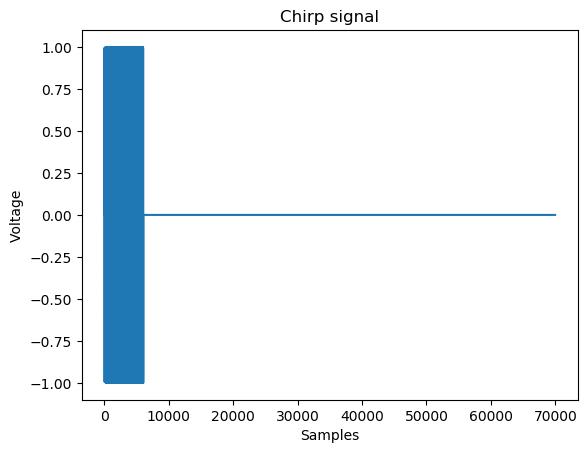

8.333333333333333e-7

In [58]:
#STEP 1: Chirp pulse creation
#import Pkg; Pkg.add("CSV")
#import Pkg; Pkg.add("DataFrames")
c = 343;  # Speed of sound in air in m/s
B = 2000; # Chirp bandwidth
fs = 1200000; # This is the sample rate of the sonar.
dt = 1/fs; # This is the sample spacing
print(dt);
r_max = 10; # Maximum range in metres to which to simulate.
t_max = 2*r_max/c; # Time delay to max range

# Create an array containing the time values of the samples
t = collect(0:dt:t_max); # t=0:dt:t_max defines a “range”.
# Create an array containing the range values of the samples
r = c*t/2;
# NOW create the chirp pulse, shifted by an amount td, to start at
# some time td-T/2>0.
f0 = 41000; # Centre frequency is 40 kHz
T = 5E-3; # Chirp pulse length
K = B/T; # Chirp rate
# Define a simple a rect() function which returns for -0.5<=t<=0.5 or 0.
# The function will work if t is an array of values.
rect(t) = (abs.(t) .<= 0.5)*1.0
# rect(t/T) spans the interval [-T/2,T/2]
# We must therefore delay the chirp pulse so that it starts after t=0.
# Shift the chirp pulse by 0.6T units to the right, so that it starts at
td = 0.51*T; # Chirp delay
# Note: one can use the macro “@.” to avoid having to put “.” for arrays:
# @. v_tx = cos( 2*pi*(f0*(t-td) + 0.5*K*(t-td).^2) ).*rect((t-td)/T);
v_tx = cos.( 2*pi*(f0*(t .- td) + 0.5*K*(t .- td).^2) ) .* rect.((t .-td)/T);


using PyPlot; pygui(false) # import plot library
# If not installed, add the package via: using Pkg; Pkg.add("PyPlot");
figure() # Create a new figure
plot(v_tx) # Basic plot, axis labeled in samples
title("Chirp signal")
xlabel("Samples");
ylabel("Voltage");


In [59]:
#print(v_tx);

In [60]:
#set 2048 as mid point.
#rmul!(v_tx, 128)
count =0
c=0
p ="{" 
check = false
DAC_array = Int[]
zeroCount =0
#open("delim_file.txt", "w") do io
for i = 1:length(v_tx)
    z =2047.5 + 2047.5*v_tx[i]
    y = round(z, digits=0)
    b = string(y)
    d = string(b,", ")
    #print(d)
    p = string(p,d)
    push!(DAC_array,y)
    #writedlm(io, DAC_array, ',')
    c =c+1
    if(v_tx[i] > 0)
        check = true
        #zeroCount = zeroCount+1
    end
    if(v_tx[i] == 0)
        zeroCount = zeroCount+1
    end
    if(v_tx[i] == 0 && check)
        count =count +1
    end 
    
    if(count >=5)
        break
    end
    
end
using DelimitedFiles
#writedlm( "DAC.csv",  DAC_array[1:length(DAC_array)])
#Awritedlm(f, A, delim='\t'; opts)
print("CSV created")
#print(DAC_array)
print("\n")
print(c)
print("\ninitialCount\n")
print(zeroCount)
println()
print(length(v_tx)- length(DAC_array))
#open("DAC_array.txt", "w") do io
#    writedlm(io, p)
#end

error in running finalizer: ErrorException(

base64 binary data: T1MgZXJyb3IgY29kZSAwOiBUaGUgb3BlcmF0aW9uIGNvbXBsZXRlZCBzdWNjZXNzZnVsbHkuJQAAAAAAAAAFsAgAAAAAACUAAAAAAAAAQAAAAAAAAABvbXBsZXRlZCBzdWNjZXNzZnVsbHkuQ1NWIGNyZWF0ZWQKNjA2Ngppbml0aWFsQ291bnQKNjUKNjM5MDU=


"From C:\Users\MikeR\.julia\packages\LibSerialPort\2dlyw\src\wrap.jl: 141:

libserialport returned SP_ERR_ARG - Function was called with invalid arguments.")
error in running finalizer: ErrorException("From C:\Users\MikeR\.julia\packages\LibSerialPort\2dlyw\src\wrap.jl: 141:

libserialport returned SP_ERR_ARG - Function was called with invalid arguments.")
error in running finalizer: ErrorException("task switch not allowed from inside gc finalizer")
error in running finalizer: ErrorException("From C:\Users\MikeR\.julia\packages\LibSerialPort\2dlyw\src\wrap.jl: 141:

libserialport returned SP_ERR_ARG - Function was called with invalid arguments.")
error in running finalizer: ErrorException("task switch not allowed from inside gc finalizer")


In [61]:
D_array = collect(0:dt:t_max)
for i = 1:length(v_tx)
    if(v_tx[i]<=0)
        D_array[i] =0
    else
        D_array[i] =1
    end
end
    
#print(D_array)

In [62]:
using Pkg; Pkg.add("SerialPorts")

 Resolving package versions...
  Updating `C:\Users\MikeR\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\MikeR\.julia\environments\v1.1\Manifest.toml`
 [no changes]


OS error code 0: The operation completed successfully.

error in running finalizer: ErrorException("task switch not allowed from inside gc finalizer")


1-element Array{String,1}:
 "COM6"

In [18]:
using SerialPorts
list_serialports() # show available ports
#sp = SerialPort("/dev/ttyACM0", 9600) # Linux example to open a port
sp = SerialPort("COM6", 9600) # On windows try "COM4:"
write(sp, 'c') # write a string to the port (or use a binary data type)
#sleep(0.1) # Give time for a response from the micro
write(sp, 'p') # write a string to the port (or use a binary data type)
s = readavailable(sp) # read from the port (s is now of type String)
print("String")
println(s)
x = Vector{UInt8}(s) # Convert string to an array of Uint8 integers.
println(x)
close(sp) # close the port

MethodError: MethodError: no method matching SerialPort(::String, ::Int64)
Closest candidates are:
  SerialPort(::Any, ::Any, !Matched::Any) at C:\Users\MikeR\.julia\packages\LibSerialPort\2dlyw\src\high-level-api.jl:7
  SerialPort(::AbstractString) at C:\Users\MikeR\.julia\packages\LibSerialPort\2dlyw\src\high-level-api.jl:18

In [8]:
# TYPICAL USAGE
using LibSerialPort
list_ports() # Show available ports.
println("Yes")
sp=open("COM6",9600) # Or whatever in Linux, Windows or Mac.
println("RIP")
write(sp, "c") # This writes out the ASCII codes for H, e, l, l and o.

sleep(0.2) # Give time for a response from the micro
# Check if some data is now in the receive buffer:

write(sp,"p") # Print DMA buffer
BytesAvailable = bytesavailable(sp) # Number of bytes available in the buffer
println("Bytes available:",BytesAvailable)
x=zeros(UInt8,BytesAvailable) # Create an Uint8 array into which to read the bytes.
for n = 1:BytesAvailable
 x[n]=read(sp,UInt8)
 #println(Int(x[n]))
end
for n in x
    println(n)
end
close(sp) # Close the port.



COM6
	Description:	USB Serial Device (COM6)
	Transport type:	SP_TRANSPORT_USB
COM6
	Description:	USB Serial Device (COM6)
	Transport type:	SP_TRANSPORT_USB
COM6
	Description:	USB Serial Device (COM6)
	Transport type:	SP_TRANSPORT_USB
COM6
	Description:	USB Serial Device (COM6)
	Transport type:	SP_TRANSPORT_USB
Yes
RIP
Bytes available:96
57
49
13
10
57
57
52
13
10
49
48
55
54
13
10
49
50
51
54
13
10
49
49
57
49
13
10
49
49
49
56
13
10
49
51
55
48
13
10
49
53
57
49
13
10
49
53
55
49
13
10
49
54
55
57
13
10
49
50
55
57
13
10
49
67
111
110
118
101
114
115
105
111
110
32
99
111
109
112
108
101
116
101
32
105
110
32
53
57
57
57
56
32
117
115
10


SerialPort(Ptr{LibSerialPort.SPPort} @0x0000000024bdef20, false, false)

In [66]:
sp_last_error_message()

"The operation completed successfully."

In [67]:
import Pkg; Pkg.add("LibSerialPort")

 Resolving package versions...
  Updating `C:\Users\MikeR\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\MikeR\.julia\environments\v1.1\Manifest.toml`
 [no changes]


In [68]:
%%time
r = ser.read_all() # clear serial buffer

# Start a conversion
ser.write(b'c')
while ser.in_waiting < 1:
    pass # wait for a response
time.sleep(0.05) # This extra delay helps with reliability - it gives the micro time to send all it needs to
r = ser.read_all()
#print("fadgjaoigr")
print(r) # Prints the time

# Get the values
ser.write(b'p') # Print DMA buffer
while ser.in_waiting < 1:
    pass # wait for a response

a = []
i = 0
while True:
    if ser.in_waiting < 1:
        time.sleep(0.005) # Wait and check again
        if ser.in_waiting < 1:
            break
    b = ser.readline()
    a.append(b)
    i += 1
    
print(len(a), i) # Should be 10000 readings

ser.close() # Close the connection when you're done.

The analogue of IPython's `%time statement` (also `%timeit`) in Julia is `@time statement`.  The analogue of `%%time ...code...` is

```
@time begin
    ...code...
end
```

Note, however, that you should put all performance-critical code into a function, avoiding global variables, before doing performance measurements in Julia; see the [performance tips in the Julia manual](http://docs.julialang.org/en/latest/manual/performance-tips/).

The `@time` macro prints the timing results, and returns the value of evaluating the expression.  To instead return the time (in seconds), use `@elapsed statement`.

For more extensive benchmarking tools, including the ability to collect statistics from multiple runs, see the [BenchmarkTools package](https://github.com/JuliaCI/BenchmarkTools.jl).


In [69]:
# Basic serial console.
# Data is read from a serial device and lines (but not individual keypresses)
# are written to the device asynchronously.

using LibSerialPort

function serial_loop(sp::SerialPort)
    input_line = ""
    mcu_message = ""
    #sp=open("COM6:",115200)
    println("Starting I/O loop. Press ESC [return] to quit")

    while true
        # Poll for new data without blocking
        @async input_line = readline(keep=true)
        @async mcu_message *= read(sp, String)

        # Alternative read method:
        # Requires setting a timeout and may cause bottlenecks
        # @async mcu_message = readuntil(sp, "\r\n", 50)

        occursin("\e", input_line) && exit()

        # Send user input to device
        if endswith(input_line, '\n')
            write(sp, "$input_line")
            input_line = ""
        end

        # Print message from device
        if occursin("\r\n", mcu_message)
            lines = split(mcu_message, "\r\n")
            while length(lines) > 1
                println(popfirst!(lines))
            end
            mcu_message = lines[1]
        end

        # Give the queued tasks a chance to run
        sleep(0.0001)
    end
end

function console(args)

    if length(args) != 2
        println("Usage: $(basename(@__FILE__)) port baudrate")
        println("Available ports:")
        list_ports()
        return
    end

    # Open a serial connection to the microcontroller
    mcu = open(args[1], parse(Int, args[2]))

    serial_loop(mcu)
end

console("COM6","115200")

MethodError: MethodError: no method matching console(::String, ::String)
Closest candidates are:
  console(::Any) at In[69]:46

In [70]:
 import Pkg; Pkg.add("PyCall")
import Pkg; Pkg.add("PySerial")

 Resolving package versions...
  Updating `C:\Users\MikeR\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\MikeR\.julia\environments\v1.1\Manifest.toml`
 [no changes]


Pkg.Types.PkgError: The following package names could not be resolved:
 * PySerial (not found in project, manifest or registry)
Please specify by known `name=uuid`.

In [71]:

using PySerial

# construct a serial port object
# positional and keyword arguments can be used just like in the python module
ser = Serial("/dev/ttyUSB0", baudrate=19200) 

# read all the waiting characters and output them on the terminal
w = inWaiting(ser)
if w > 0
  s = read(ser,w)
  print(s)
end

# close the serial port
close(ser)

ArgumentError: ArgumentError: Package PySerial not found in current path:
- Run `import Pkg; Pkg.add("PySerial")` to install the PySerial package.


In [72]:
using PySerial

function serial2tty(s)
  while true
   w = inWaiting(ser)
   if w > 0
     s = read(ser,w)
     print(s)
   end
   sleep(0.001)
  end
end

function tty2serial(s)
  while !eof(STDIN)
    c = read(STDIN, Uint8) # it seems to be buffered until newline, that's not so good for a general terminal application, but ok...
    write(s,[c])
  end
end

port = length(ARGS) > 0 ? ARGS[1] : "/dev/ttyUSB0"
baudrate = length(ARGS) > 1 ? int(ARGS[2]) : 9600

ser = Serial(port, baudrate=baudrate)
println("== Welcome to juliaterm.jl! Port: $port, baudrate: $baudrate ==")

@async serial2tty(ser)
tty2serial(ser)

ArgumentError: ArgumentError: Package PySerial not found in current path:
- Run `import Pkg; Pkg.add("PySerial")` to install the PySerial package.
